In [1]:
%matplotlib widget

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.interpolate import griddata
data = pd.read_csv('population_changes.csv')

# TODO: replace all '-' with np.nan in Přírůstek... columns
data['PřírůstekCelkový'] = data['PřírůstekCelkový'].replace('-', np.nan)
data['PřírůstekCelkový'] = data['PřírůstekCelkový'].astype(float)
data['Stav 1.1.'] = data['Stav 1.1.'].replace('-', np.nan).astype(float)
data

C:\Users\micha\AppData\Local\Temp\ipykernel_3472\1545035698.py:8: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('population_changes.csv')


,Rok,NObce,NázevObce,Vznik,Stav 1.1.,Narození,Zemřelí,Přistěhovalí,Vystěhovalí,PřírůstekPřirozený,PřírůstekMigrační,PřírůstekCelkový,ÚzemníZměna1,Stav 31.12.,ÚzemníZměna2,Odkud,Odkud (název obce),Kam,Kam (název obce),KAM
0,1971,210001,Běchovice,-,1859.0,17,35,75,97,-18,-22,-40.0,-,1819,-,NaN,NaN,NaN,NaN,NaN
1,1972,210001,Běchovice,-,1819.0,26,26,103,63,-,40,40.0,-,1859,-,NaN,NaN,NaN,NaN,NaN
2,1973,210001,Běchovice,-,1859.0,26,28,59,75,-2,-16,-18.0,-,1841,-1841,NaN,NaN,554782.0,Praha,NaN
3,1971,210002,Benice,-,336.0,9,4,6,15,5,-9,-4.0,-,332,-,NaN,NaN,NaN,NaN,NaN
4,1972,210002,Benice,-,332.0,2,8,7,20,-6,-13,-19.0,-,313,-,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298150,2016,568449,Zbyslavice,-,613.0,8,3,24,9,5,15,20.0,-,633,-,NaN,NaN,NaN,NaN,NaN
298151,2017,568449,Zbyslavice,-,633.0,6,7,21,21,-1,-,-1.0,-,632,-,NaN,NaN,NaN,NaN,NaN
298152,2018,568449,Zbyslavice,-,632.0,8,5,10,9,3,1,4.0,-,636,-,NaN,NaN,NaN,NaN,NaN
298153,2019,568449,Zbyslavice,-,636.0,7,7,6,18,-,-12,-12.0,-,624,-,NaN,NaN,NaN,NaN,NaN


1. Visualize population changes on map
   1. One year
   2. changes over time - can we visualize timeseries?
2. city shifts - inclusions and exclusions

(array([6.25e+03, 1.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([1.5000000e+01, 1.3244120e+05, 2.6486740e+05, 3.9729360e+05,
        5.2971980e+05, 6.6214600e+05, 7.9457220e+05, 9.2699840e+05,
        1.0594246e+06, 1.1918508e+06, 1.3242770e+06]),
 <BarContainer object of 10 artists>)

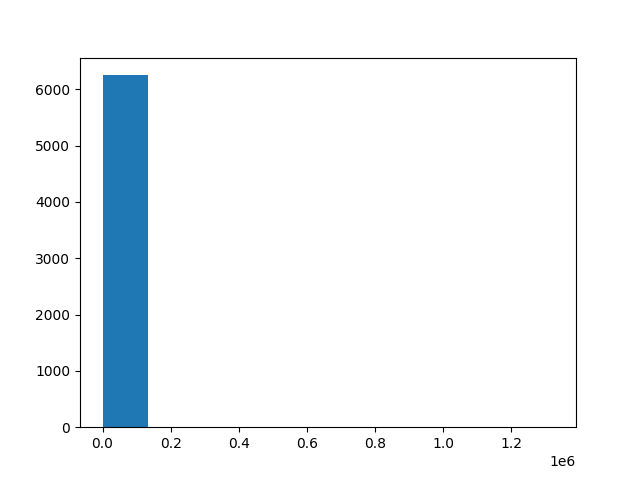

In [2]:
data2020 = data[data.Rok == 2020]
fig2, ax = plt.subplots()

ax.hist(data2020['Stav 1.1.'], bins=10)

# fig.show()

# data2020['Stav 1.1.']

In [3]:
towns_qps = pd.read_csv('data/obce-cr-gps.csv')
towns_qps.rename(columns={'sirka':'lats', 'delka': 'lons'}, inplace=True)

data_with_gps = towns_qps.merge(data, left_on='obeckod', right_on='NObce')
data_with_gps.sort_values(['Rok', 'lats', 'lons'], inplace=True)

data2020 = data2020.merge(towns_qps, left_on='NObce', right_on='obeckod')
data2020 = data2020.sort_values(by=['lats', 'lons'])
data2020.head()
data_by_years = data_with_gps.groupby('Rok')


In [4]:
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from mpl_toolkits.basemap import Basemap

def create_CZ_map() -> tuple[Basemap, Axes, Figure]:
    fig, ax = plt.subplots()
    m = Basemap(ax=ax, projection='merc',llcrnrlat=48.5,urcrnrlat=51.2,
            llcrnrlon=12,urcrnrlon=19,lat_ts=20,resolution='i')

    m.drawcountries(linewidth=0.5)
    m.fillcontinents(color='#dddddd', lake_color='#0000ff')
    m.readshapefile('shapefiles/cz', 'cz', drawbounds=True)
    
    return m, ax, fig


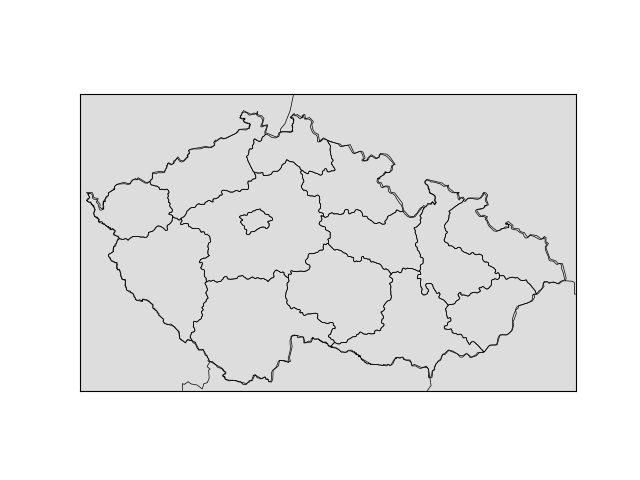

In [5]:
# import matplotlib.pyplot as plt

m, ax, fig2 = create_CZ_map()


1266   -1.304348
1296    0.152847
1275   -2.379461
1284   -5.936073
1274   -1.649175
          ...   
2444    1.309039
2852   -2.167183
2430   -1.899827
2859    2.231237
2431   -0.719424
Length: 6252, dtype: float64

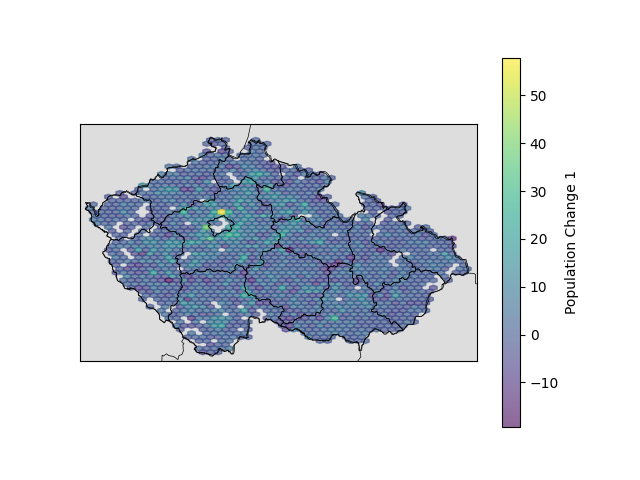

In [6]:
m, ax, fig2 = create_CZ_map()
# Convert latitude and longitude to map projection coordinates
x, y = m(data2020['lons'], data2020['lats'])

# # Plot the density map
# sc = m.scatter(x, y, cmap='viridis', alpha=0.5)


total_changes_norm = (data2020['PřírůstekCelkový'] * 100) / data2020['Stav 1.1.']
# sc = m.scatter(x, y, s=total_changes_norm*100, alpha=0.5, edgecolor='k', linewidth=0.5)
hb = ax.hexbin(x, y, C=total_changes_norm, gridsize=50, cmap='viridis', reduce_C_function=np.sum, alpha=0.6)
# ax.title('Density Map of Population Changes in Towns') # TODO: add title
plt.colorbar(hb, label='Population Change 1')


total_changes_norm

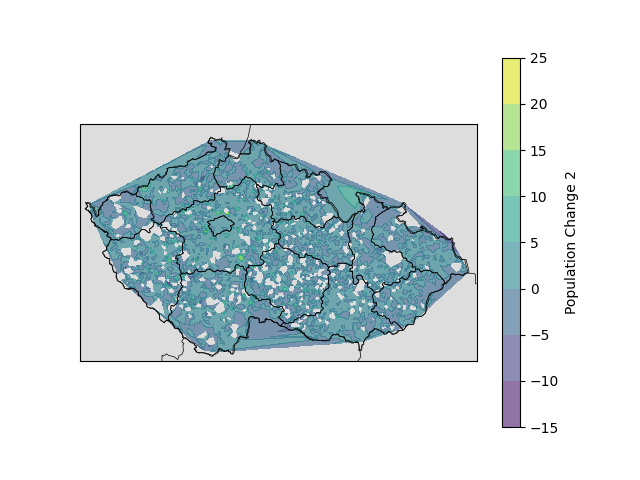

In [7]:

m, ax, fig2 = create_CZ_map()
# Convert latitude and longitude to map projection coordinates
x, y = m(data2020['lons'].values, data2020['lats'].values)



# Create a grid for the contour plot
xi = np.linspace(min(x), max(x), 500)
yi = np.linspace(min(y), max(y), 500)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the population change data onto the grid
zi = griddata((x, y), total_changes_norm, (xi, yi), method='linear')

# Plot the contour map
cs = m.contourf(xi, yi, zi, cmap='viridis', alpha=0.6)
plt.colorbar(cs, label='Population Change 2')


# ax.show()

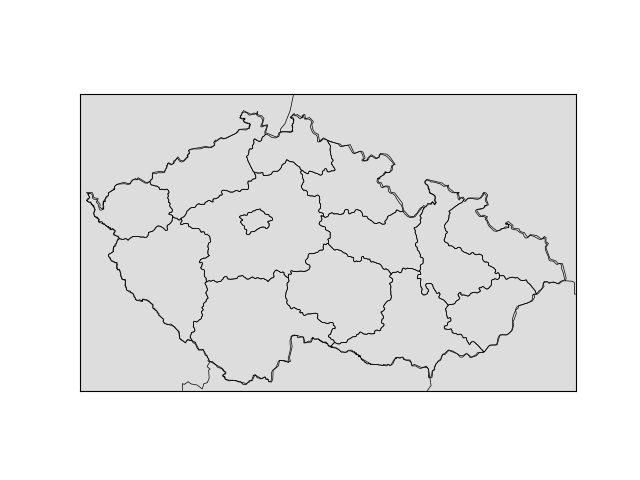

In [8]:
# Convert latitude and longitude to map projection coordinates


# for year, data in data_by_year:
#     plt.figure()
#     plt.scatter(data['lons'], data['lats'], c=data['Stav 1.1.'], cmap='viridis')
#     plt.colorbar()
#     plt.title(year)
#     plt.show()

# Create a grid for the contour plot
m_cont, ax_cont, fig_cont = create_CZ_map()

contourf_plot = None
def update_hist1(year_data):
    global contourf_plot
    year, data = year_data
    print(year)
    # TODO: precompute the grid for the contour plot
    x, y = m_cont(data['lons'].values, data['lats'].values)
    xi = np.linspace(min(x), max(x), 500)
    yi = np.linspace(min(y), max(y), 500)
    xi, yi = np.meshgrid(xi, yi)
    total_changes_norm = (data['PřírůstekCelkový'] * 100) / data['Stav 1.1.']
    zi = griddata((x, y), total_changes_norm, (xi, yi), method='linear')

    # Plot the contour map
    if contourf_plot is not None:
        contourf_plot.remove()
    
    contourf_plot = m_cont.contourf(xi, yi, zi, cmap='viridis', alpha=0.6)
    ax_cont.set_title(f'Density Map of Population Changes in Towns in {year}')
    # plt.colorbar(contourf_plot, label='Population Change')


    
animation = animation.FuncAnimation(fig_cont, update_hist1, data_by_years)
# for year, data in data_by_years:
#     update_hist1((year, data))
#     plt.pause(0.2)
    


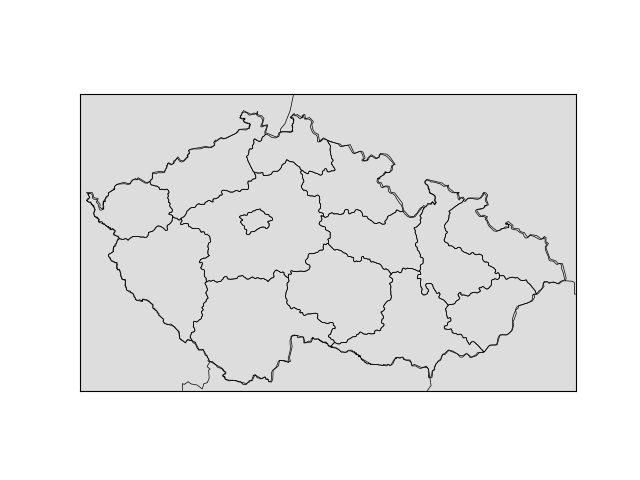

In [9]:
import matplotlib.animation as animation

m_bin, ax_bin, fig_bin = create_CZ_map()

hb = None
cb = None

def update_hist(year_data):
    global hb, cb
    year, data = year_data
    # TODO: precompute the grid for the contour plot
    x, y = m_bin(data['lons'].values, data['lats'].values)
    total_changes_norm = (data['PřírůstekCelkový'] * 100) / data['Stav 1.1.']

    # Plot the contour map
    if hb is not None:
        hb.remove()
    
    hb = ax_bin.hexbin(x, y, C=total_changes_norm, gridsize=50, cmap='viridis', reduce_C_function=np.sum, alpha=0.6)
    ax_bin.set_title(f'Density Map of Population Changes in Towns in {year}')

    if cb is not None:
        cb.remove()
    cb = plt.colorbar(hb, label='Population Change')
    


    
animation = animation.FuncAnimation(fig_bin, update_hist, data_by_years, interval=1000)
# for year, data in data_by_years:
#     update_hist((year, data))
#     plt.pause(0.2)


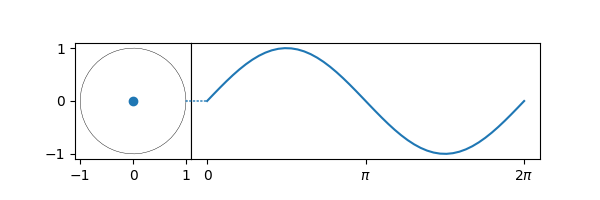

In [10]:


from matplotlib.patches import ConnectionPatch
import matplotlib.animation as animation


fig2, (axl, axr) = plt.subplots(
    ncols=2,
    sharey=True,
    figsize=(6, 2),
    gridspec_kw=dict(width_ratios=[1, 3], wspace=0),
)
axl.set_aspect(1)
axr.set_box_aspect(1 / 3)
axr.yaxis.set_visible(False)
axr.xaxis.set_ticks([0, np.pi, 2 * np.pi], ["0", r"$\pi$", r"$2\pi$"])

# draw circle with initial point in left Axes
x = np.linspace(0, 2 * np.pi, 50)
axl.plot(np.cos(x), np.sin(x), "k", lw=0.3)
point, = axl.plot(0, 0, "o")

# draw full curve to set view limits in right Axes
sine, = axr.plot(x, np.sin(x))

# draw connecting line between both graphs
con = ConnectionPatch(
    (1, 0),
    (0, 0),
    "data",
    "data",
    axesA=axl,
    axesB=axr,
    color="C0",
    ls="dotted",
)
fig2.add_artist(con)


def animate(i):
    x = np.linspace(0, i, int(i * 25 / np.pi))
    sine.set_data(x, np.sin(x))
    x, y = np.cos(i), np.sin(i)
    point.set_data([x], [y])
    con.xy1 = x, y
    con.xy2 = i, y
    return point, sine, con

ani = animation.FuncAnimation(
    fig2,
    animate,
    interval=50,
    blit=False,  # blitting can't be used with Figure artists
    frames=x,
    repeat_delay=100,
)

# fig.show()
